# Домашнее задание по ML №1

Результат выполнения задания — это отчёт в формате html на основе Jupyter Notebook. Нормальный отчёт должен включать в себя:

* Краткую постановку задачи и формулировку задания
* Описание минимума необходимой теории и/или описание используемых инструментов - не стоит переписывать лекции или Википедию
* Подробный пошаговый рассказ о проделанной работе
* Аккуратно оформленные результаты
* Внятные выводы – не стоит относится к домашнему заданию как к последовательности сугубо технических шагов, а стоит относится скорее как к небольшому практическому исследованию, у которого есть своя цель и свое назначение.

## Задачи:

1. Проверить, получается ли восстановить кластерную структуру новостей, то есть, разделить их на 28 кластеров, соответствущих событиям.
2. Проверить, получается ли использовать кластерный анализ для обобщения.

## Импортируем библиотеки

Для успешной работы с данными должны быть установлены следующие библиотеки:

* numpy
* pandas
* sklearn
* sklearn
* nltk
* pymystem3 (для качественной лемматизации)
* matplotlib
* seaborn

Проект сделан в Python3.

In [5]:
# coding: utf-8

import re
import numpy as np
import pandas as pd
from nltk import word_tokenize
import nltk
from nltk.corpus import stopwords
from pymystem3 import Mystem
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

## Часть 1. Предварительная обработка текстов

Проведите предобработку новостей: токенизацию, приведение к нижнему регистру, лемматизацию. Проверьте, есть ли в коллекции дубликаты. Посчитайте, сколько новостей относится к каждому резонансному событию.

In [6]:
# Загрузили данные
df_events = pd.read_csv('events.csv')
df_news = pd.read_csv('raw_news.csv', index_col='id')

In [7]:
print(df_events.head())

   id               date                                               name
0   1  01/10/17 12:00 AM  Власти Петербурга согласились передать РПЦ Иса...
1   2  01/20/17 12:00 AM  Дональд Трамп вступил в должность президента США.
2   3  02/20/17 12:00 AM  Скоропостижно скончался постпред России при ОО...
3   4  03/02/17 12:00 AM           Вышел фильм Навального «он Вам не димон»
4   5  03/14/17 12:00 AM  CNN показала фильм «Владимир Путин — самый вли...


Посмотрим на данные:

In [13]:
print(df_news.head(10))

    event_id                                               text
id                                                             
0          1   В ПЕТЕРБУРГЕ ПРОШЕЛ МИТИНГ ПРОТИВ ПЕРЕДАЧИ ИС...
1          1   Lenta.co, Москва, 14 января 2017 СИТУАЦИЯ С П...
2          1   Аргументы и Факты (aif.ru), Москва, 14 января...
3          1   Google Новости ТОП, Москва, 14 января 2017 АК...
4          1   Газета.Ru, Москва, 13 января 2017 В МОСКОВСКО...
5          1   Top Real Estate (topre.ru), Москва, 13 января...
6          1   Findnews.ru, Москва, 13 января 2017 ПОЛИЦИЯ Н...
7          1   ПРАВДА.info (pravda.info), Москва, 13 января ...
8          1   Голос Америки (golos-ameriki.ru), Москва, 13 ...
9          1   Выбор Народа (vybor-naroda.org), Москва, 13 я...


In [14]:
# Загрузили стопслова для русского языка из nltk
stopset = stopwords.words('russian')
print(stopset[:10])

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']


In [15]:
# Токенизация, лемматизация
m = Mystem()
def tokenize(text, stopset):
    arr = []
    text = [re.sub('[!"?/\\().:;,-]', '', msg) for msg in text] # убрали знаки препинания
    text = [' '.join(m.lemmatize(msg.lower())) for msg in text] # лемматизировали и привели к нижнему регистру
    text = [[w for w in word_tokenize(msg) if not w in stopset] for msg in text] # токенизировали и избавились от стоп слов
    for msg in text:
        arr.append(' '.join(msg))
    return arr # возвращаю массив стрингов. каждый стринг --- это один документ

In [17]:
print(tokenize(df_news['text'][:10], stopset))

['петербург проходить митинг против передача исаакиевский собор рпц санктпетербург человек устраивать акция протест против передача исаакиевский собор безвозмездный пользование рпц житель петербург собираться исаакиевский площадь высказываться против передача исаакиевский собор безвозмездный пользование рпц передавать тасс акция проходить формат встреча депутат законодательный собрание город требовать согласование власть участник акция использовать какуюлибо символика плакат также мегафон средство звукоусиление слово депутат алексей ковалев исаакиевский площадь приходить примерно тысяча человек участник протест выступать депутат местный парламент борис вишневский максим резник который заявлять потребовать отмена решение смольный вишневский сообщать акция проходить вид встреча депутат избиратель закон санктпетербург предоставлять право встречаться избиратель встреча проводить рассказывать защищать интерес передача собор сказать парламентарий свой очередь директор музей исаакиевский собо

In [18]:
df_news['text'] = tokenize(df_news['text'], stopset) # перезаписали столбец в датасете
print(df_news.head())

    event_id                                               text
id                                                             
0          1  петербург проходить митинг против передача иса...
1          1  lentaco москва 14 январь 2017 ситуация передач...
2          1  аргумент факт aifru москва 14 январь 2017 оппо...
3          1  google новость топ москва 14 январь 2017 акция...
4          1  газетаru москва 13 январь 2017 московский патр...


In [19]:
print(df_news.groupby('event_id').describe())

                                                              text
event_id                                                          
1        count                                                 100
         unique                                                100
         top     qualnewsru москва 13 январь 2017 санктпетербур...
         freq                                                    1
2        count                                                  51
         unique                                                 51
         top     госновость rusgosnewscom москва 20 январь 2017...
         freq                                                    1
3        count                                                  84
         unique                                                 84
         top     дэлайт новость delateinfo москва 20 февраль 20...
         freq                                                    1
4        count                                                

Выше мы посчитала кол-во новостей для каждого события.В 9-м резонансном событии уникальных новостей меньше, чем их общее кол-во. Отсюда следуюет -- дубликаты в девятом резонансном событии.

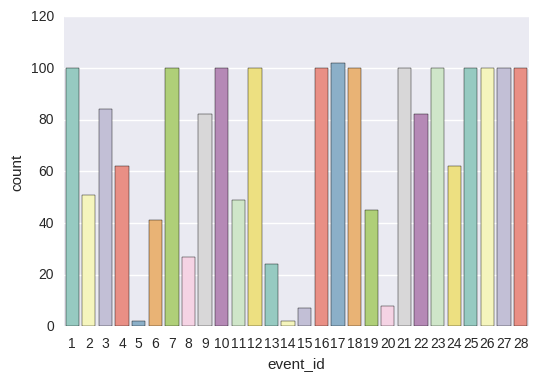

In [20]:
sns.countplot(x=df_news['event_id'], data=df_news, palette="Set3")

Из представленного выше графика видно, что данные неоднородны.

## Часть 2. Кластеризация текстов

**Задание**: Любым известным вам алгоритмом найдите в коллекции новостей 28 кластеров. Используйте $tf-idf$ преобразование, сингулярное разложение, нормировку признакого пространства и любые другие техники обработки данных, которые вы считаете нужным. Используйте любые известные вам меры качества для оценки качества кластеризации. Покажите, как $tf-idf$ преобразование или сингулярное разложение или любая другая использованная вами техника влияет на качество кластеризации.

**Задача**: Проверить, получается ли восстановить кластерную структуру новостей, то есть, разделить их на 28 кластеров, соответствущих событиям.

### Строим k-means модель на tf-idf

В этом разделе мы применим один из методов кластеризации с использованием tf-idf и метода k-means.

#### Tf-idf преобразование

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

Преобразовываем документы в векторы с tf-idf.

In [33]:
bow_tfidf = TfidfVectorizer()
bowed_news = bow_tfidf.fit_transform(df_news['text'])

#### K-means кластериазация

In [34]:
from sklearn.cluster import KMeans

In [40]:
model = KMeans(n_clusters=28, init='k-means++', max_iter=100, n_init=1)
model.fit(bowed_news)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=28, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = bow_tfidf.get_feature_names()
for i in range(28):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
 
 
print("\n")
print("Prediction")

Top terms per cluster:
Cluster 0:
 барселона
 теракт
 человек
 риа
 испания
 камбрильс
 фургон
 каталония
 новость
 въезжать
Cluster 1:
 тиллерсон
 лавров
 асад
 сша
 переговоры
 госсекретарь
 сирия
 путин
 сирийский
 рекс
Cluster 2:
 макрон
 франция
 победа
 тур
 пена
 ле
 выборы
 эммануэль
 президент
 французский
Cluster 3:
 вороненков
 денис
 убийство
 киев
 убивать
 украина
 бывший
 эксдепутат
 госдума
 депутат
Cluster 4:
 путин
 прямой
 линия
 вопрос
 президент
 это
 владимир
 сказать
 год
 который
Cluster 5:
 евтушенко
 евгений
 поэт
 похоронить
 жизнь
 85м
 переделкино
 апрель
 умирать
 подмосковье
Cluster 6:
 навальный
 суд
 акция
 митинг
 сутки
 арест
 административный
 алексей
 задерживать
 полиция
Cluster 7:
 собор
 исаакиевский
 передача
 рпц
 церковь
 музей
 музейный
 январь
 православный
 санктпетербург
Cluster 8:
 курортный
 сбор
 законопроект
 эксперимент
 инфраструктура
 введение
 край
 вносить
 крым
 краснодарский
Cluster 9:
 чуркин
 виталий
 оон
 дипломат
 февраль
 с

### Оценки

In [27]:
from sklearn.metrics import *

В этом разделе мы описываем суть метрик качества и их значение для модели с дефолтными настройками. В следующем разделе мы попробуем другие модели и пытаемся проинтерпретировать результаты.

In [41]:
labels = df_news.event_id # истинные метки событий
clust_labels = model.labels_ # метки номеров кластеров, вохвращённых алгортмом

Меряем Adjusted Rand Index.

**Rand Index (RI)** выражает схожесть двух разных кластеризаций одной и той же выборки. Пусть n — число объектов в выборке, a — число пар объектов, имеющих одинаковые метки и находящихся в одном кластере, b — число пар объектов, имеющих различные метки и находящихся в разных кластерах.

$$RI = \frac{2(a + b)}{n(n - 1)}$$

Это доля объектов, для которых эти разбиения (исходное и полученное в результате кластеризации) "согласованы". Эта мера не зависит от значений и перестановок меток. 

**Adjusted Rand Index** — это Rand Index, нормированный, чтобы он давал значения близкие к нулю для случайных кластеризаций при любом n и числе кластеров:

$$ARI = \frac{RI - E[RI]}{max(RI)-E[RI]}$$

(Теория взята из статьи на хабрахабр: https://habrahabr.ru/company/ods/blog/325654/)

In [42]:
print("Adjusted Rand-Index:",  adjusted_rand_score(labels, clust_labels))

Adjusted Rand-Index: 0.89118848878


Меряем гомогенность, полноту и V-меру.

Пусть K — результат кластеризации, C — истинное разбиение выборки на классы. Гомогенность h и полнота с определяются с использованием функций энтропии и условной энтропии:

$$h = 1 - \frac{H(C|K)}{H(C)}\text{, }c = 1 - \frac{H(K|C)}{H(K)}$$

V-мера -- это гармоическое среднее от h и c.

Так как данные метрики дают более точный результат при маленьком количестве кластеров, мы будем в большей мере ориентироваться на ARI.
(Теория взята из статьи на хабрахабр: https://habrahabr.ru/company/ods/blog/325654/)

In [43]:
print("Гомогенность:", homogeneity_score(labels, clust_labels))
print("Полнота:", completeness_score(labels, clust_labels))
print("V-мера",  v_measure_score(labels, clust_labels))

Гомогенность: 0.960033445125
Полнота: 0.936223474638
V-мера 0.947978977317
